# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()  
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
# escrevendo as colunas do dataframe
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [5]:
# criando um dataframe apenas com as colunas desejadas 
sinasc_mun = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']].dropna().drop_duplicates()
sinasc_mun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4735 entries, 0 to 27026
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IDADEMAE    4735 non-null   int64  
 1   IDADEPAI    4735 non-null   float64
 2   munResNome  4735 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 148.0+ KB


In [6]:
# agruparei conforme o nome de cada município e retornarei a média de cada variável disponível
sinasc_mun.groupby('munResNome').agg(np.median)

C:\Users\earap\AppData\Local\Temp\ipykernel_12356\2988311094.py:2: FutureWarning: The provided callable <function median at 0x000002DE691C6AC0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sinasc_mun.groupby('munResNome').agg(np.median)


IDADEMAE  IDADEPAI
munResNome                                   
Alta Floresta D'Oeste          26.0      29.5
Alto Alegre dos Parecis        25.0      29.0
Alto Paraíso                   22.5      25.5
Alvorada D'Oeste               26.0      30.0
Ariquemes                      28.0      29.0
Buritis                        23.5      29.0
Cabixi                         35.0      35.5
Cacaulândia                    31.0      35.0
Cacoal                         28.0      32.0
Campo Novo de Rondônia         23.5      29.5
Candeias do Jamari             23.0      30.0
Castanheiras                   27.5      30.0
Cerejeiras                     28.0      30.0
Chupinguaia                    27.5      29.0
Colorado do Oeste              31.0      34.0
Corumbiara                     31.0      30.0
Costa Marques                  23.0      29.0
Cujubim                        28.5      34.5
Espigão D'Oeste                27.0      31.0
Governador Jorge Teixeira      24.0      28.0
Guajará-Mirim                  25.0      30.0
Itapuã do Oeste                29.5      40.0
Jaru                           29.0      31.5
Ji-Paraná                      28.0      32.0
Machadinho D'Oeste             26.0      32.0
Ministro Andreazza             28.0      33.0
Mirante da Serra               26.0      33.0
Monte Negro                    26.5      36.0
Município ignorado - RO        24.0      22.0
Nova Brasilândia D'Oeste       27.5      29.0
Nova Mamoré                    25.0      32.0
Nova União                     28.0      30.0
Novo Horizonte do Oeste        27.0      30.0
Ouro Preto do Oeste            27.0      32.0
Parecis                        27.0      32.5
Pimenta Bueno                  26.0      30.0
Pimenteiras do Oeste           32.0      36.0
Porto Velho                    28.0      33.0
Presidente Médici              25.5      29.0
Primavera de Rondônia          27.0      32.5
Rio Crespo                     26.0      28.0
Rolim de Moura                 28.0      32.0
Santa Luzia D'Oeste            26.0      30.0
Seringueiras                   24.0      29.0
São Felipe D'Oeste             26.0      29.5
São Francisco do Guaporé       26.5      31.5
São Miguel do Guaporé          27.0      32.0
Teixeirópolis                  29.0      29.0
Theobroma                      23.5      28.5
Urupá                          28.0      30.0
Vale do Anari                  26.0      34.0
Vale do Paraíso                26.0      30.0
Vilhena                        30.0      33.5

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [7]:
# escrevendo as colunas do dataframe
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [8]:
# separando um df apenas com as variáveis em análise
sinasc_dia = sinasc_raw[['DTNASC', 'PESO']].dropna().drop_duplicates()
sinasc_dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24240 entries, 0 to 27027
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DTNASC  24240 non-null  object
 1   PESO    24240 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 568.1+ KB


In [9]:
# visualizando o tipo de dado de cada variável
sinasc_dia.dtypes

DTNASC    object
PESO       int64
dtype: object

In [10]:
# convertendo a coluna DTNASC para datetime
sinasc_dia['DTNASC'] = pd.to_datetime(sinasc_dia['DTNASC'], errors='coerce').reset_index(drop=True)

In [11]:
# visualizando o tipo de dado de cada variável
sinasc_dia.dtypes

DTNASC    datetime64[ns]
PESO               int64
dtype: object

In [12]:
# exibindo a estruturação do dado
sinasc_dia

DTNASC  PESO
0     2019-02-19  3685
1     2019-02-21  3055
2     2019-02-25  3460
3     2019-03-20  2982
4     2019-03-23  3310
...          ...   ...
27023        NaT  2110
27024        NaT  3310
27025        NaT  3065
27026        NaT  2352
27027        NaT  4240

[24240 rows x 2 columns]

In [13]:
# contando os valores únicos para a variável
sinasc_dia['DTNASC'].nunique()

365

In [14]:
# fazendo o recorte apenas para a data do exercicio
sinasc_recorte = sinasc_dia[sinasc_dia['DTNASC'] == '2019-08-25']

In [15]:
# calculando o peso médio para a data
sinasc_recorte.groupby('DTNASC').agg(np.median)

C:\Users\earap\AppData\Local\Temp\ipykernel_12356\2287278155.py:2: FutureWarning: The provided callable <function median at 0x000002DE691C6AC0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sinasc_recorte.groupby('DTNASC').agg(np.median)


PESO
DTNASC            
2019-08-25  3264.0

In [16]:
# agrupando e contando o número de nascimentos por município para cada coluna
peso_medio = sinasc_recorte.groupby('DTNASC').agg({'PESO': ['mean', 'median', 'min', 'max']})

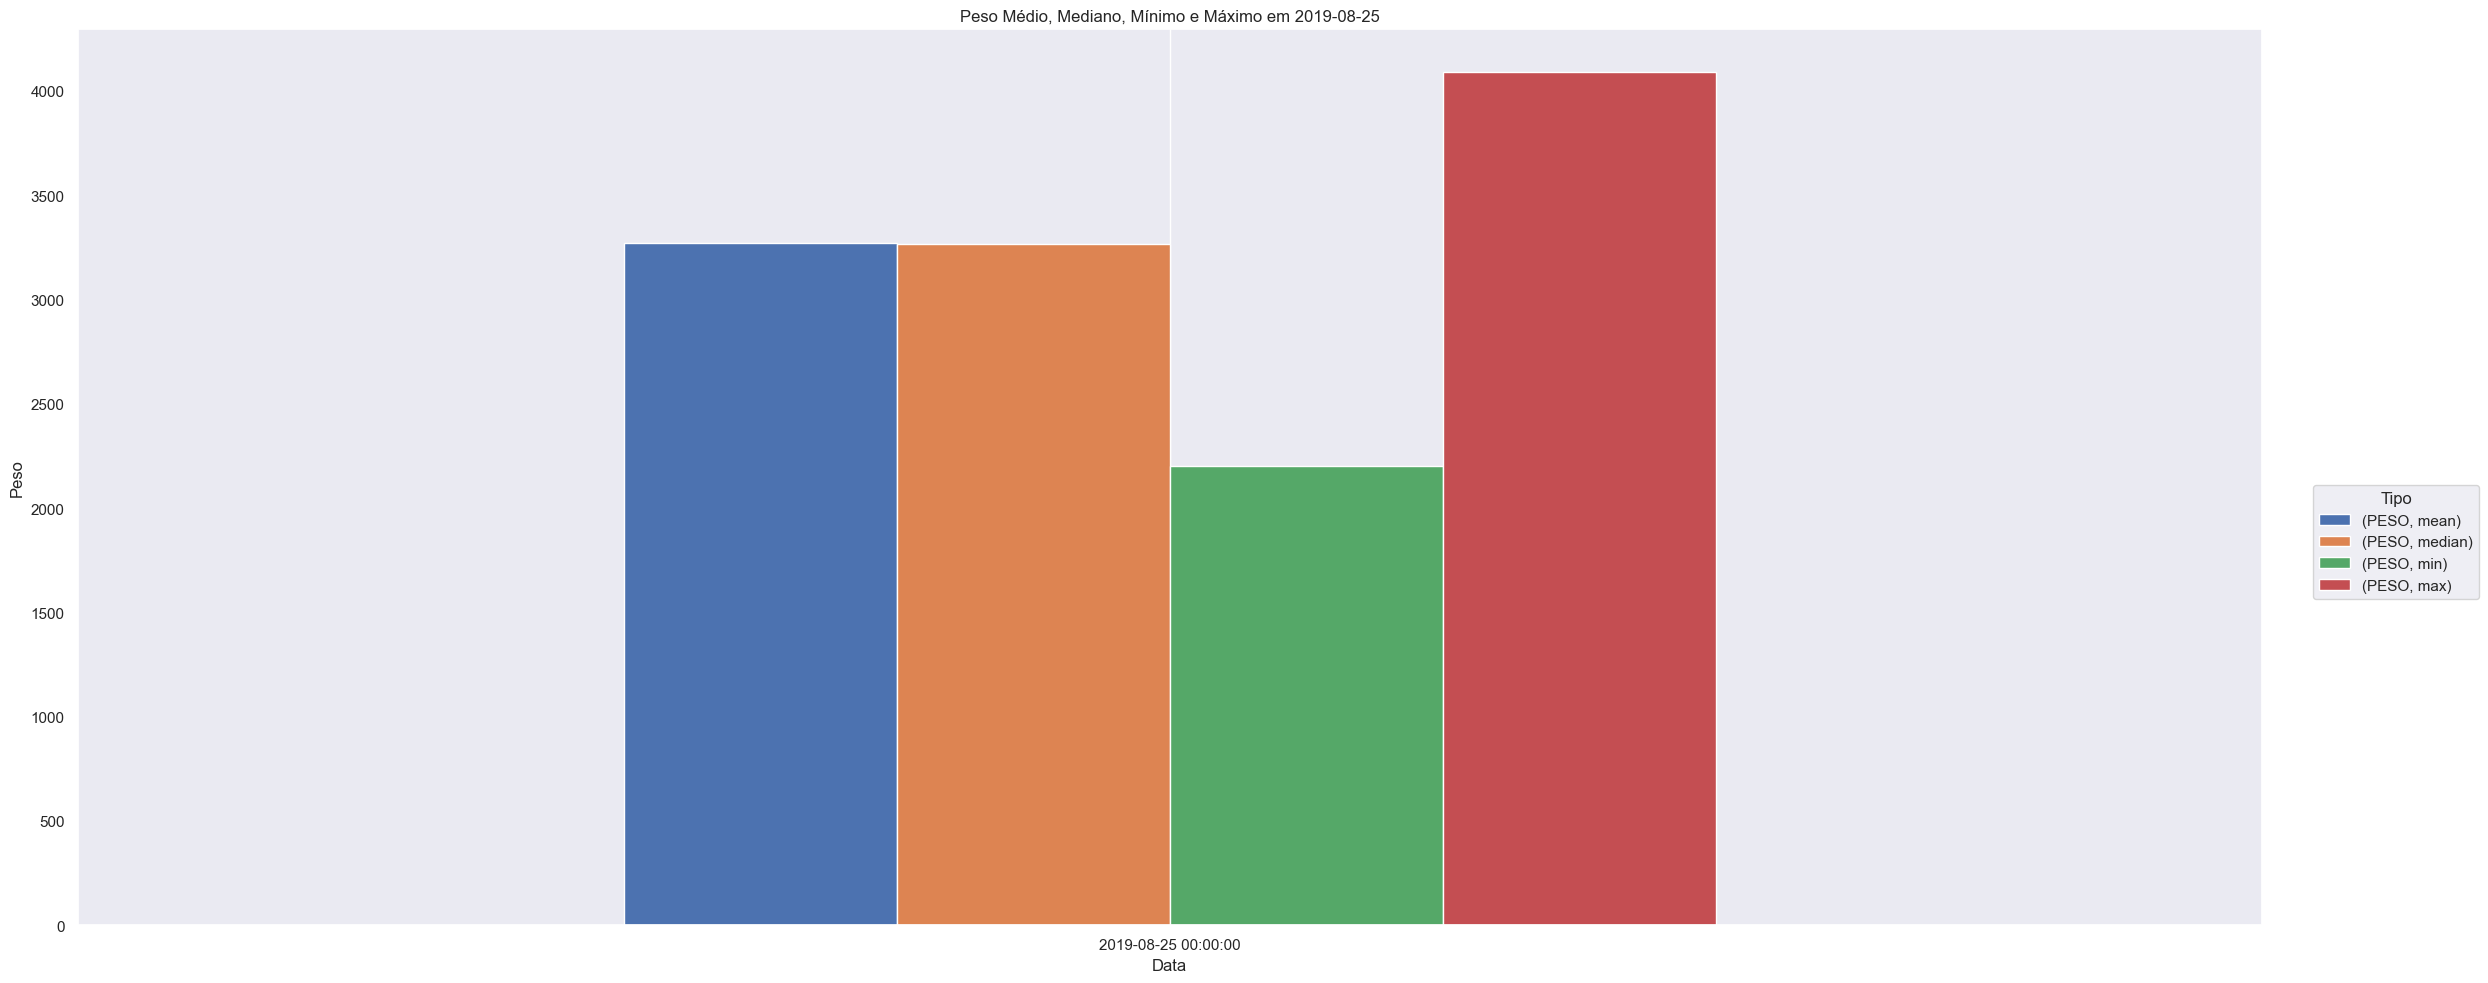

In [17]:
# criar o gráfico
fig, ax = plt.subplots(figsize=[25, 10])

# plotar as médias
peso_medio.plot(kind='bar', ax=ax)

# ajustar a legenda
ax.legend(title='Tipo', bbox_to_anchor=(1.02, 0.5), loc='upper left')

# adicionar título e rótulos
plt.title('Peso Médio, Mediano, Mínimo e Máximo em 2019-08-25')
plt.xlabel('Data')
plt.ylabel('Peso')

# rotacionar os rótulos do eixo x para melhor leitura
plt.xticks(rotation=0)

plt.grid(axis='y')
plt.tight_layout()  # ajusta o layout para que tudo se ajuste bem
plt.show()

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [18]:
# escrevendo as colunas do dataframe
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [19]:
# criando um df apenas com as variáveis a serem analisadas
sinasc_bb = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']].dropna().drop_duplicates()
sinasc_bb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4735 entries, 0 to 27026
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   munResNome  4735 non-null   object 
 1   IDADEMAE    4735 non-null   int64  
 2   IDADEPAI    4735 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 148.0+ KB


In [20]:
# top municípios com menos nascimentos em 2019
sinasc_bb['munResNome'].value_counts(ascending=True)

munResNome
Rio Crespo                     1
Município ignorado - RO        1
Pimenteiras do Oeste           5
Cacaulândia                    5
Alto Paraíso                   6
Cabixi                         6
Itapuã do Oeste                8
Governador Jorge Teixeira      9
Cujubim                       10
Theobroma                     12
Ariquemes                     15
Vale do Anari                 15
Guajará-Mirim                 17
Corumbiara                    17
Candeias do Jamari            19
Castanheiras                  26
Chupinguaia                   26
Monte Negro                   28
Colorado do Oeste             29
Campo Novo de Rondônia        30
Primavera de Rondônia         32
Seringueiras                  34
São Francisco do Guaporé      34
Parecis                       36
Nova Mamoré                   36
Teixeirópolis                 40
Vale do Paraíso               42
Costa Marques                 42
Nova Brasilândia D'Oeste      44
São Felipe D'Oeste            46

In [21]:
# calculando, por município, a idade média, máxima e mínima da Mãe e Pai do BB
sinasc_bb.groupby('munResNome').agg([np.mean, max, 'min'])

C:\Users\earap\AppData\Local\Temp\ipykernel_12356\2994975011.py:2: FutureWarning: The provided callable <function mean at 0x000002DE690872E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sinasc_bb.groupby('munResNome').agg([np.mean, max, 'min'])
C:\Users\earap\AppData\Local\Temp\ipykernel_12356\2994975011.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sinasc_bb.groupby('munResNome').agg([np.mean, max, 'min'])
C:\Users\earap\AppData\Local\Temp\ipykernel_12356\2994975011.py:2: FutureWarning: The provided callable <function mean at 0x000002DE690872E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep c

IDADEMAE           IDADEPAI            
                                mean max min       mean   max   min
munResNome                                                         
Alta Floresta D'Oeste      26.352679  53  14  30.388393  58.0  17.0
Alto Alegre dos Parecis    24.792793  41  14  29.621622  50.0  16.0
Alto Paraíso               22.833333  32  16  28.833333  49.0  21.0
Alvorada D'Oeste           26.814433  40  15  30.659794  52.0  17.0
Ariquemes                  28.133333  39  15  32.466667  51.0  20.0
Buritis                    25.000000  42  16  30.948276  49.0  18.0
Cabixi                     32.166667  38  18  34.333333  47.0  19.0
Cacaulândia                31.000000  42  18  37.200000  50.0  28.0
Cacoal                     28.265306  47  14  33.408163  66.0  17.0
Campo Novo de Rondônia     24.900000  40  17  30.500000  40.0  21.0
Candeias do Jamari         23.684211  34  15  29.894737  41.0  21.0
Castanheiras               27.846154  39  18  29.923077  43.0  17.0
Cerejeiras                 28.138462  42  15  31.507692  52.0  19.0
Chupinguaia                27.269231  38  17  30.000000  46.0  20.0
Colorado do Oeste          31.137931  41  23  34.379310  53.0  23.0
Corumbiara                 29.000000  43  17  32.470588  52.0  21.0
Costa Marques              25.547619  41  17  31.023810  60.0  17.0
Cujubim                    27.400000  37  17  31.400000  44.0  19.0
Espigão D'Oeste            27.057778  44  14  31.831111  86.0  16.0
Governador Jorge Teixeira  25.555556  34  17  29.222222  37.0  22.0
Guajará-Mirim              26.058824  39  19  30.470588  44.0  19.0
Itapuã do Oeste            31.375000  39  27  42.500000  73.0  25.0
Jaru                       28.767241  44  15  32.586207  62.0  19.0
Ji-Paraná                  27.848624  44  13  32.965596  63.0  15.0
Machadinho D'Oeste         26.354839  40  13  31.537634  53.0  17.0
Ministro Andreazza         27.842857  44  17  33.728571  55.0  21.0
Mirante da Serra           27.171053  41  16  32.763158  56.0  20.0
Monte Negro                27.642857  40  15  34.678571  55.0  20.0
Município ignorado - RO    24.000000  24  24  22.000000  22.0  22.0
Nova Brasilândia D'Oeste   27.000000  38  15  30.250000  48.0  20.0
Nova Mamoré                26.305556  46  15  31.972222  43.0  19.0
Nova União                 27.569231  39  16  31.630769  53.0  18.0
Novo Horizonte do Oeste    27.306667  41  16  32.146667  56.0  20.0
Ouro Preto do Oeste        27.589641  44  14  32.015936  60.0  17.0
Parecis                    27.111111  41  17  33.027778  61.0  18.0
Pimenta Bueno              26.421725  47  13  31.220447  70.0  16.0
Pimenteiras do Oeste       32.600000  40  27  35.600000  45.0  25.0
Porto Velho                28.504087  44  12  33.348774  65.0  16.0
Presidente Médici          26.240741  43  15  30.592593  64.0  16.0
Primavera de Rondônia      27.781250  39  17  31.718750  44.0  21.0
Rio Crespo                 26.000000  26  26  28.000000  28.0  28.0
Rolim de Moura             27.798489  44  14  32.443325  69.0  16.0
Santa Luzia D'Oeste        26.115385  41  15  31.230769  53.0  18.0
Seringueiras               25.058824  39  15  30.500000  47.0  20.0
São Felipe D'Oeste         26.782609  41  17  31.413043  57.0  18.0
São Francisco do Guaporé   27.235294  40  15  32.000000  54.0  19.0
São Miguel do Guaporé      27.648649  42  17  33.067568  60.0  19.0
Teixeirópolis              27.650000  39  16  31.750000  67.0  20.0
Theobroma                  24.916667  38  19  30.083333  45.0  23.0
Urupá                      27.252632  43  15  31.094737  48.0  17.0
Vale do Anari              27.133333  39  17  34.000000  58.0  23.0
Vale do Paraíso            25.642857  40  14  30.214286  51.0  18.0
Vilhena                    30.428571  44  16  34.111111  60.0  18.0

In [22]:
# agrupando e contando o número de nascimentos por município para cada coluna
idade_media = sinasc_bb.groupby('munResNome').agg({'IDADEMAE': 'mean', 'IDADEPAI': 'mean'})
idade_media

IDADEMAE   IDADEPAI
munResNome                                     
Alta Floresta D'Oeste      26.352679  30.388393
Alto Alegre dos Parecis    24.792793  29.621622
Alto Paraíso               22.833333  28.833333
Alvorada D'Oeste           26.814433  30.659794
Ariquemes                  28.133333  32.466667
Buritis                    25.000000  30.948276
Cabixi                     32.166667  34.333333
Cacaulândia                31.000000  37.200000
Cacoal                     28.265306  33.408163
Campo Novo de Rondônia     24.900000  30.500000
Candeias do Jamari         23.684211  29.894737
Castanheiras               27.846154  29.923077
Cerejeiras                 28.138462  31.507692
Chupinguaia                27.269231  30.000000
Colorado do Oeste          31.137931  34.379310
Corumbiara                 29.000000  32.470588
Costa Marques              25.547619  31.023810
Cujubim                    27.400000  31.400000
Espigão D'Oeste            27.057778  31.831111
Governador Jorge Teixeira  25.555556  29.222222
Guajará-Mirim              26.058824  30.470588
Itapuã do Oeste            31.375000  42.500000
Jaru                       28.767241  32.586207
Ji-Paraná                  27.848624  32.965596
Machadinho D'Oeste         26.354839  31.537634
Ministro Andreazza         27.842857  33.728571
Mirante da Serra           27.171053  32.763158
Monte Negro                27.642857  34.678571
Município ignorado - RO    24.000000  22.000000
Nova Brasilândia D'Oeste   27.000000  30.250000
Nova Mamoré                26.305556  31.972222
Nova União                 27.569231  31.630769
Novo Horizonte do Oeste    27.306667  32.146667
Ouro Preto do Oeste        27.589641  32.015936
Parecis                    27.111111  33.027778
Pimenta Bueno              26.421725  31.220447
Pimenteiras do Oeste       32.600000  35.600000
Porto Velho                28.504087  33.348774
Presidente Médici          26.240741  30.592593
Primavera de Rondônia      27.781250  31.718750
Rio Crespo                 26.000000  28.000000
Rolim de Moura             27.798489  32.443325
Santa Luzia D'Oeste        26.115385  31.230769
Seringueiras               25.058824  30.500000
São Felipe D'Oeste         26.782609  31.413043
São Francisco do Guaporé   27.235294  32.000000
São Miguel do Guaporé      27.648649  33.067568
Teixeirópolis              27.650000  31.750000
Theobroma                  24.916667  30.083333
Urupá                      27.252632  31.094737
Vale do Anari              27.133333  34.000000
Vale do Paraíso            25.642857  30.214286
Vilhena                    30.428571  34.111111

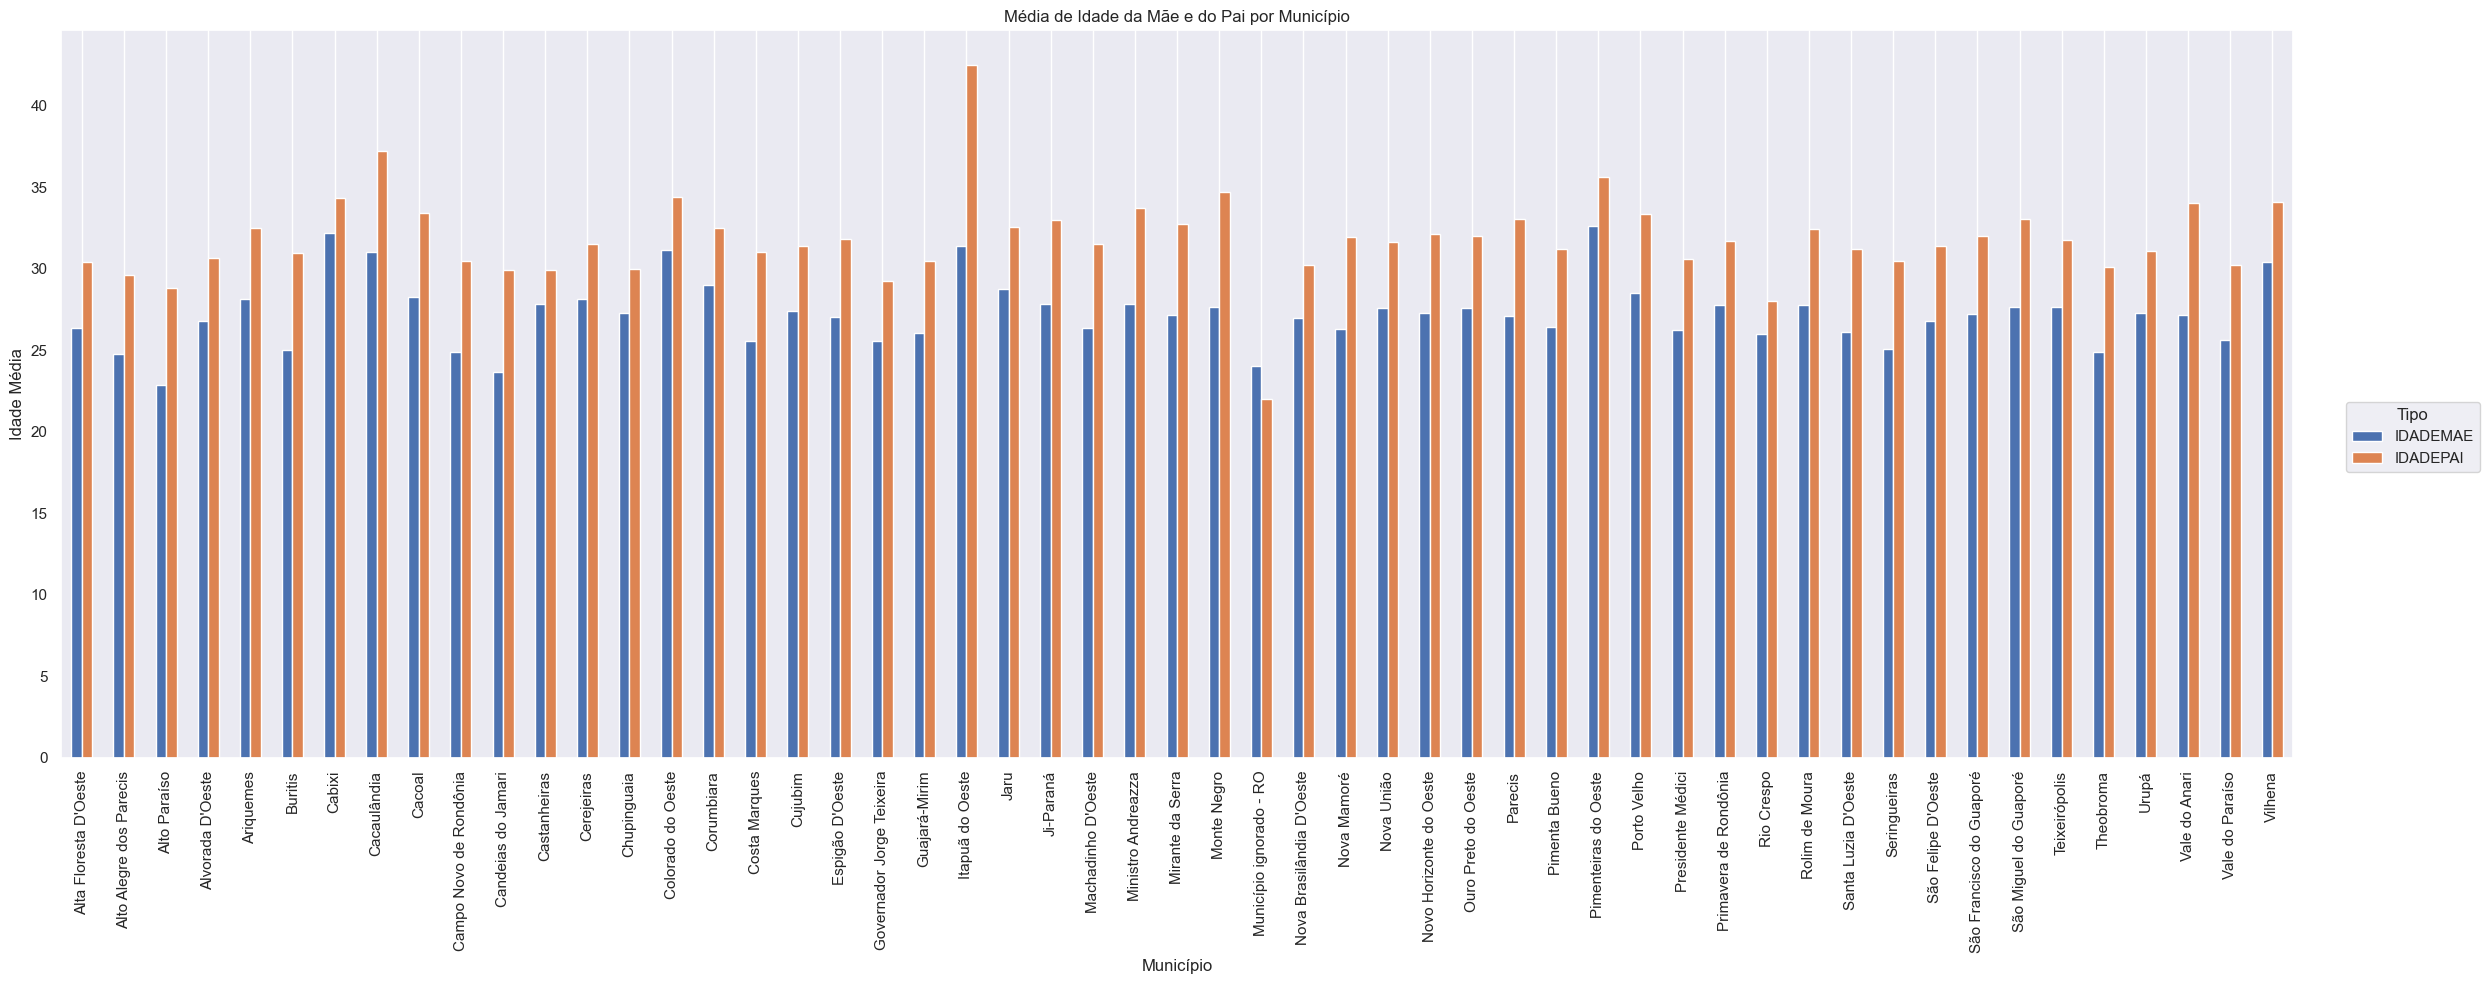

In [23]:
# criar o gráfico
fig, ax = plt.subplots(figsize=[25, 10])

# plotar as médias
idade_media.plot(kind='bar', ax=ax)

# ajustar a legenda
ax.legend(title='Tipo', bbox_to_anchor=(1.02, 0.5), loc='upper left')

# adicionar título e rótulos
plt.title('Média de Idade da Mãe e do Pai por Município')
plt.xlabel('Município')
plt.ylabel('Idade Média')

# rotacionar os rótulos do eixo x para melhor leitura
plt.xticks(rotation=90)

plt.grid(axis='y')
plt.tight_layout()  # ajusta o layout para que tudo se ajuste bem
plt.show()

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [24]:
# escrevendo as variáveis do dataframe
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [25]:
# separando o df com as variáveis desejadas 
sinasc_marco = sinasc_raw[['DTNASC', 'munResNome', 'QTDFILVIVO', 'IDADEMAE', 'IDADEPAI']].dropna().drop_duplicates()
sinasc_marco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7395 entries, 0 to 27026
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DTNASC      7395 non-null   object 
 1   munResNome  7395 non-null   object 
 2   QTDFILVIVO  7395 non-null   float64
 3   IDADEMAE    7395 non-null   int64  
 4   IDADEPAI    7395 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 346.6+ KB


In [26]:
# convertendo a coluna DTNASC para datetime
sinasc_marco['DTNASC'] = pd.to_datetime(sinasc_marco['DTNASC'])

In [27]:
# exibindo os tipos da coluna do dataframe
sinasc_marco.dtypes

DTNASC        datetime64[ns]
munResNome            object
QTDFILVIVO           float64
IDADEMAE               int64
IDADEPAI             float64
dtype: object

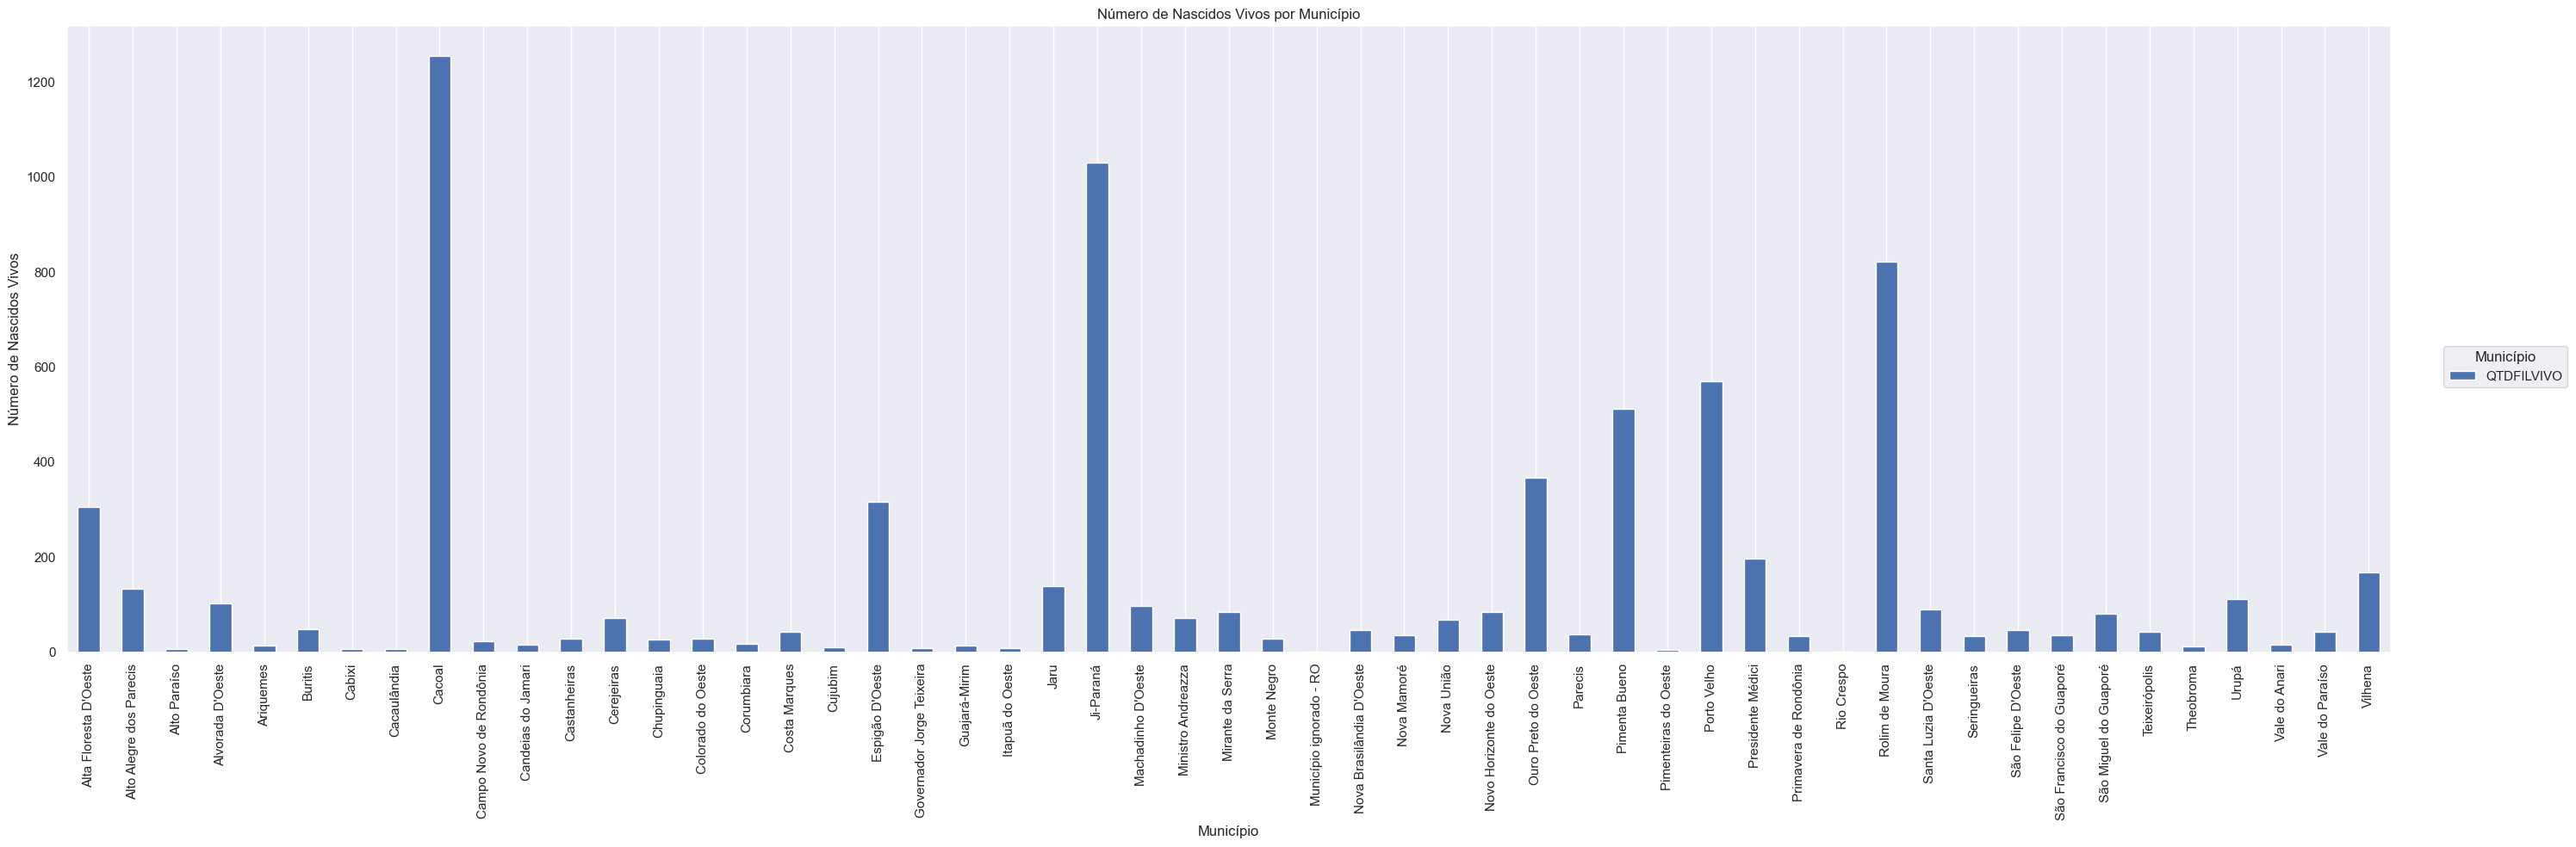

In [28]:
# agrupando e contando o número de nascimentos por município
grouped_data = sinasc_marco.groupby('munResNome')['QTDFILVIVO'].count()

# criando o gráfico
ax = grouped_data.plot(kind='bar', figsize=[30, 10])

# ajustando a legenda
ax.legend(title='Município', bbox_to_anchor=(1.02, 0.5), loc='upper left')

# Adicionando título e rótulos
plt.title('Número de Nascidos Vivos por Município')
plt.xlabel('Município')
plt.ylabel('Número de Nascidos Vivos')

# Rotacionando os rótulos do eixo x para melhor leitura
plt.xticks(rotation=90)

plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para que tudo se ajuste bem
plt.show()

In [29]:
# convertendo a coluna DTNASC para datetime
sinasc_marco_filtrado = sinasc_marco[sinasc_marco['DTNASC'].dt.month==3]
sinasc_marco_filtrado

DTNASC               munResNome  QTDFILVIVO  IDADEMAE  IDADEPAI
3     2019-03-20  Alto Alegre dos Parecis         0.0        30      24.0
4     2019-03-23    Alta Floresta D'Oeste         1.0        30      27.0
5     2019-03-27    Alta Floresta D'Oeste         2.0        33      40.0
9     2019-03-11    Alta Floresta D'Oeste         1.0        30      41.0
10    2019-03-11    Alta Floresta D'Oeste         1.0        31      28.0
...          ...                      ...         ...       ...       ...
13603 2019-03-24             Seringueiras         2.0        34      31.0
13623 2019-03-25                    Urupá         1.0        18      22.0
13664 2019-03-11              Porto Velho         0.0        20      28.0
13736 2019-03-07              Porto Velho         1.0        35      42.0
13750 2019-03-09                Ji-Paraná         0.0        31      50.0

[685 rows x 5 columns]

In [30]:
# municipio com mais nascimentos em março
resultado = sinasc_marco_filtrado.groupby('munResNome')['DTNASC'].count().sort_values(ascending=False)
resultado

munResNome
Cacoal                      121
Ji-Paraná                    93
Rolim de Moura               66
Pimenta Bueno                54
Porto Velho                  48
Ouro Preto do Oeste          40
Espigão D'Oeste              30
Alta Floresta D'Oeste        24
Vilhena                      16
Buritis                      15
Urupá                        13
Presidente Médici            13
Machadinho D'Oeste           13
Alvorada D'Oeste             10
Alto Alegre dos Parecis       9
Jaru                          9
Cerejeiras                    9
Nova Mamoré                   9
Santa Luzia D'Oeste           7
Monte Negro                   6
Vale do Paraíso               6
Ministro Andreazza            6
Parecis                       5
Novo Horizonte do Oeste       5
Chupinguaia                   5
Castanheiras                  4
Primavera de Rondônia         4
Colorado do Oeste             4
São Felipe D'Oeste            4
Vale do Anari                 3
Teixeirópolis                

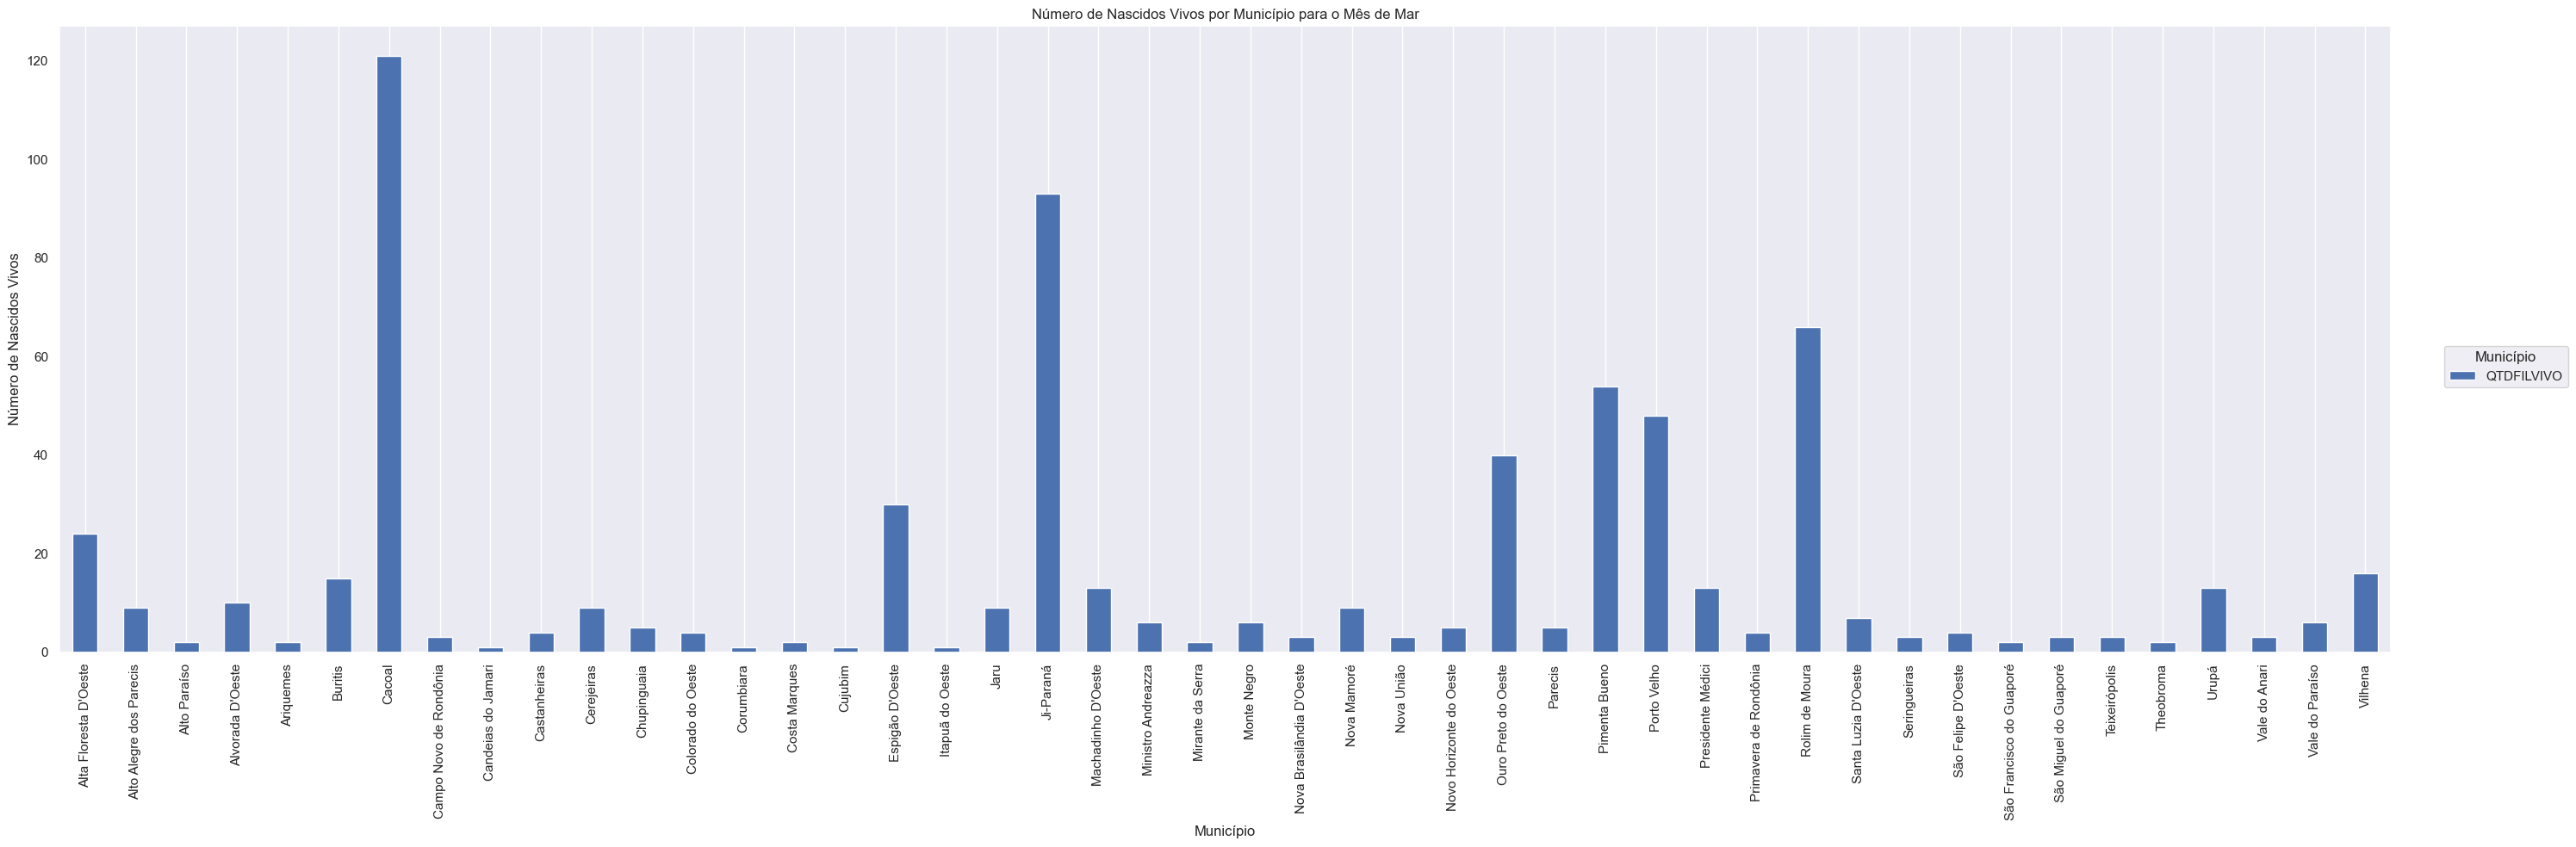

In [31]:
# agrupando e contando o número de nascimentos por município
grouped_data2 = sinasc_marco_filtrado.groupby('munResNome')['QTDFILVIVO'].count()

# criando o gráfico
ax = grouped_data2.plot(kind='bar', figsize=[30, 10])

# ajustando a legenda
ax.legend(title='Município', bbox_to_anchor=(1.02, 0.5), loc='upper left')

# Adicionando título e rótulos
plt.title('Número de Nascidos Vivos por Município para o Mês de Mar')
plt.xlabel('Município')
plt.ylabel('Número de Nascidos Vivos')

# Rotacionando os rótulos do eixo x para melhor leitura
plt.xticks(rotation=90)

plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para que tudo se ajuste bem
plt.show()

In [32]:
# filtrando os dados apenas para o município com mais nascimentos
sinasc_cacoal = sinasc_marco_filtrado[sinasc_marco_filtrado['munResNome'] == 'Cacoal'].reset_index(drop=True)
sinasc_cacoal

DTNASC munResNome  QTDFILVIVO  IDADEMAE  IDADEPAI
0   2019-03-06     Cacoal         0.0        27      26.0
1   2019-03-06     Cacoal         1.0        23      30.0
2   2019-03-06     Cacoal         1.0        20      21.0
3   2019-03-07     Cacoal         0.0        19      26.0
4   2019-03-06     Cacoal         0.0        16      30.0
..         ...        ...         ...       ...       ...
116 2019-03-02     Cacoal         1.0        19      29.0
117 2019-03-02     Cacoal         0.0        22      30.0
118 2019-03-04     Cacoal         1.0        28      31.0
119 2019-03-14     Cacoal         2.0        27      43.0
120 2019-03-29     Cacoal         1.0        25      27.0

[121 rows x 5 columns]

In [33]:
# agrupando e contando o número de nascimentos por data para cada coluna
idade_media2 = sinasc_cacoal.groupby('DTNASC').agg({'IDADEMAE': ['mean'], 'IDADEPAI': ['mean']})

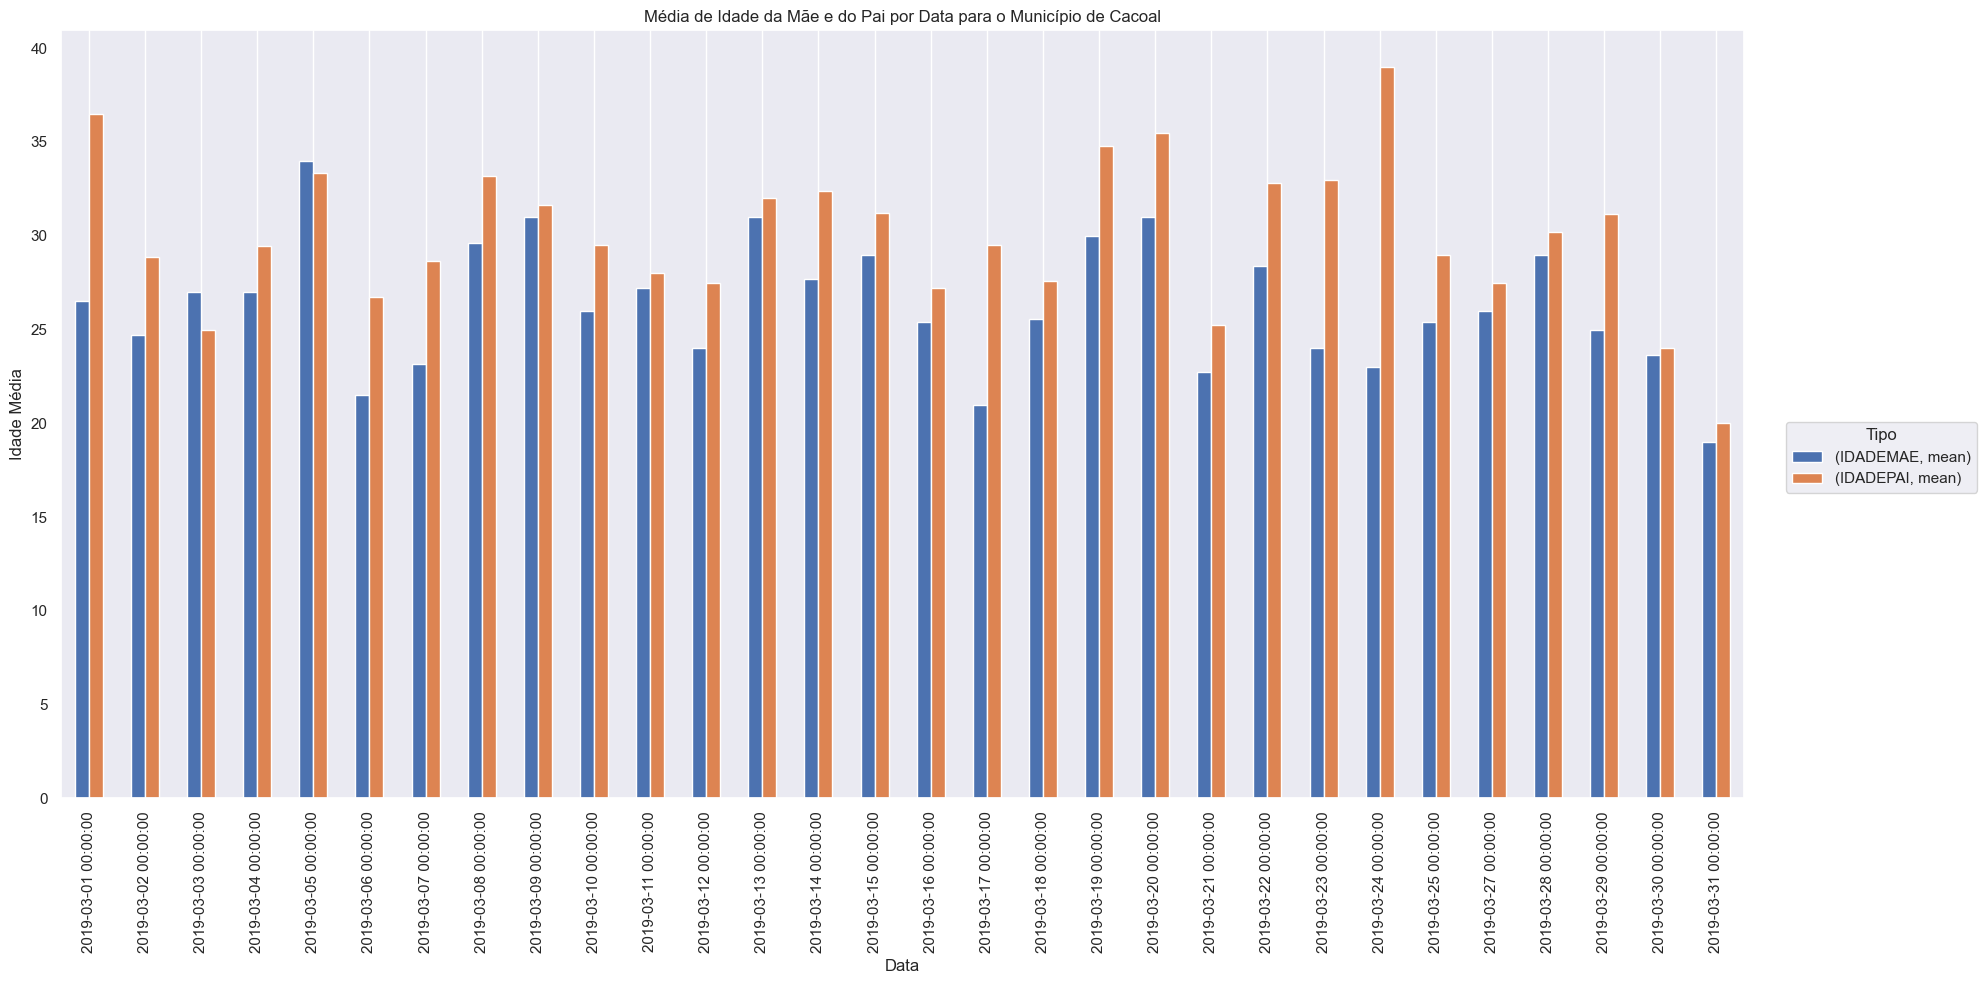

In [34]:
# criar o gráfico
fig, ax = plt.subplots(figsize=[20, 10])

# plotar as médias
idade_media2.plot(kind='bar', ax=ax)

# ajustar a legenda
ax.legend(title='Tipo', bbox_to_anchor=(1.02, 0.5), loc='upper left')

# adicionar título e rótulos
plt.title('Média de Idade da Mãe e do Pai por Data para o Município de Cacoal')
plt.xlabel('Data')
plt.ylabel('Idade Média')

# rotacionar os rótulos do eixo x para melhor leitura
plt.xticks(rotation=90)

plt.grid(axis='y')
plt.tight_layout()  # ajusta o layout para que tudo se ajuste bem
plt.show()

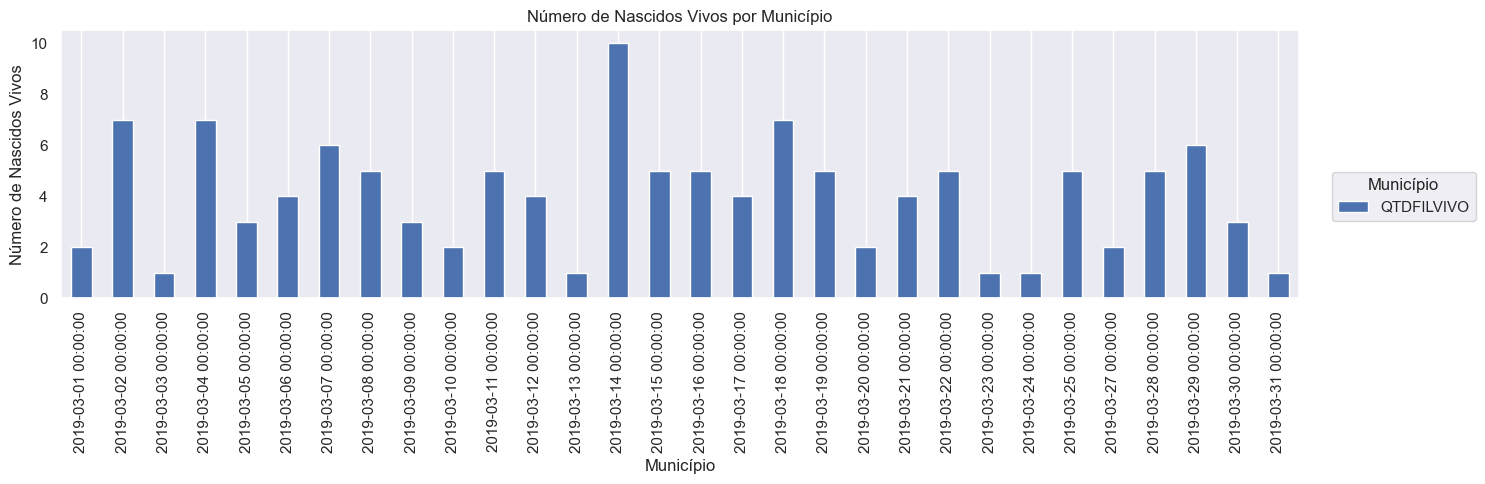

In [35]:
# agrupando e contando o número de nascimentos por município
grouped_data3 = sinasc_cacoal.groupby('DTNASC')['QTDFILVIVO'].count()

# criando o gráfico
ax = grouped_data3.plot(kind='bar', figsize=[15, 5])

# ajustando a legenda
ax.legend(title='Município', bbox_to_anchor=(1.02, 0.5), loc='upper left')

# Adicionando título e rótulos
plt.title('Número de Nascidos Vivos por Município')
plt.xlabel('Município')
plt.ylabel('Número de Nascidos Vivos')

# Rotacionando os rótulos do eixo x para melhor leitura
plt.xticks(rotation=90)

plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para que tudo se ajuste bem
plt.show()

In [36]:
#     - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
filho_vivo = sinasc_cacoal.agg({'QTDFILVIVO': ['mean',  'max', 'min']})
filho_vivo

QTDFILVIVO
mean     0.92562
max      7.00000
min      0.00000

In [37]:
#     - qual a idade media, maxima, minima dos pais nesse municipio?
idade = sinasc_cacoal.groupby(['munResNome'])
idade.dtypes

idade.agg({'IDADEMAE':[['média','mean'],'min','max'], 'IDADEPAI':[['média','mean'],'min','max']})

C:\Users\earap\AppData\Local\Temp\ipykernel_12356\673837034.py:3: FutureWarning: DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead
  idade.dtypes


IDADEMAE           IDADEPAI            
               média min max      média   min   max
munResNome                                         
Cacoal      26.38843  15  40  29.966942  17.0  47.0